# Comparing 2 groups of performance measurements


In [47]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import mannwhitneyu

## Tip!

If you wan't to do performance measurements in C# then have a look at [BenchmarkDotNet](https://benchmarkdotnet.org/index.html).


Let's say we have 2 groups of performance measurements - each with 25 observations


In [48]:
perfMeasurement1 = np.array(
    [
        27,
        20,
        21,
        26,
        27,
        31,
        24,
        21,
        20,
        19,
        23,
        24,
        28,
        19,
        24,
        29,
        18,
        20,
        17,
        31,
        20,
        25,
        28,
        21,
        27,
    ]
)
perfMeasurement2 = np.array(
    [
        21,
        22,
        15,
        12,
        21,
        21,
        19,
        26,
        22,
        24,
        17,
        23,
        19,
        22,
        20,
        24,
        18,
        13,
        29,
        21,
        19,
        14,
        23,
        17,
        20,
    ]
)

In [49]:
data = pd.DataFrame(
    {"perfMeasurement1": perfMeasurement1, "perfMeasurement2": perfMeasurement2}
)

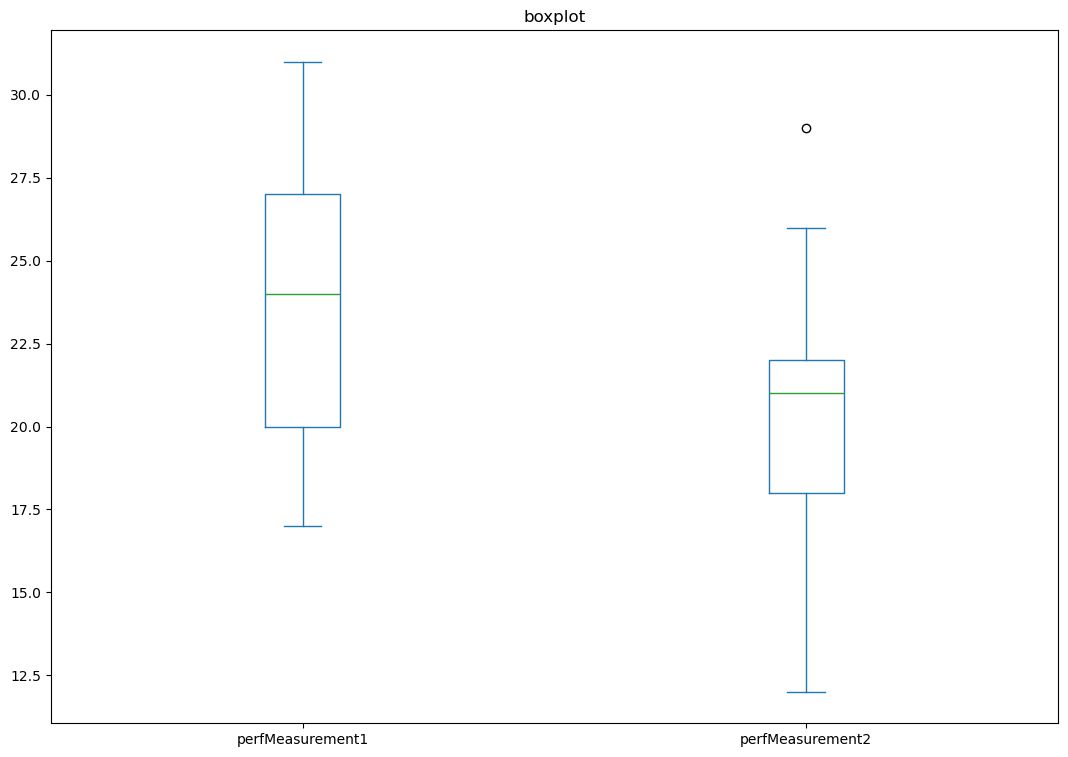

In [50]:
data.plot(kind="box", title="boxplot", figsize=(13, 9))

Please be aware that there is more accurate way of visualizing this but those plots require a bit more insight in probability distributions, so we are using the boxplot as it is easier to understand.


## Statistical test

### Student's t-test

- Prerequisites for using test
- Calculate test statistic (using some formula and find determine degrees of freedom)
- P-value
- Null hypothesis
- Significant


Let's move on by assumning that it DOES NOT make a difference if a measurement belongs to one group or another.

If that is the case they we should be able to shuffle the measurements around without any impact.


## POWERPOINT DEMO :-)


In [51]:
mean = data.mean()
mean

perfMeasurement1    23.60
perfMeasurement2    20.08
dtype: float64

In [52]:
mean = mean.iloc[0] - mean.iloc[1]
mean

3.520000000000003

In [53]:
allPerfMeasurements = np.concatenate((perfMeasurement1, perfMeasurement2))

In [54]:
n_halfPerfMeasurements = int(len(allPerfMeasurements) / 2)

In [55]:
simulated_means = []
samples = 100000

In [56]:
for i in range(0, samples):
    np.random.shuffle(allPerfMeasurements)

    simulated_means.append(
        np.mean(allPerfMeasurements[:n_halfPerfMeasurements])
        - np.mean(allPerfMeasurements[n_halfPerfMeasurements:])
    )

In [57]:
two_std = 2.0 * np.std(simulated_means, ddof=1)

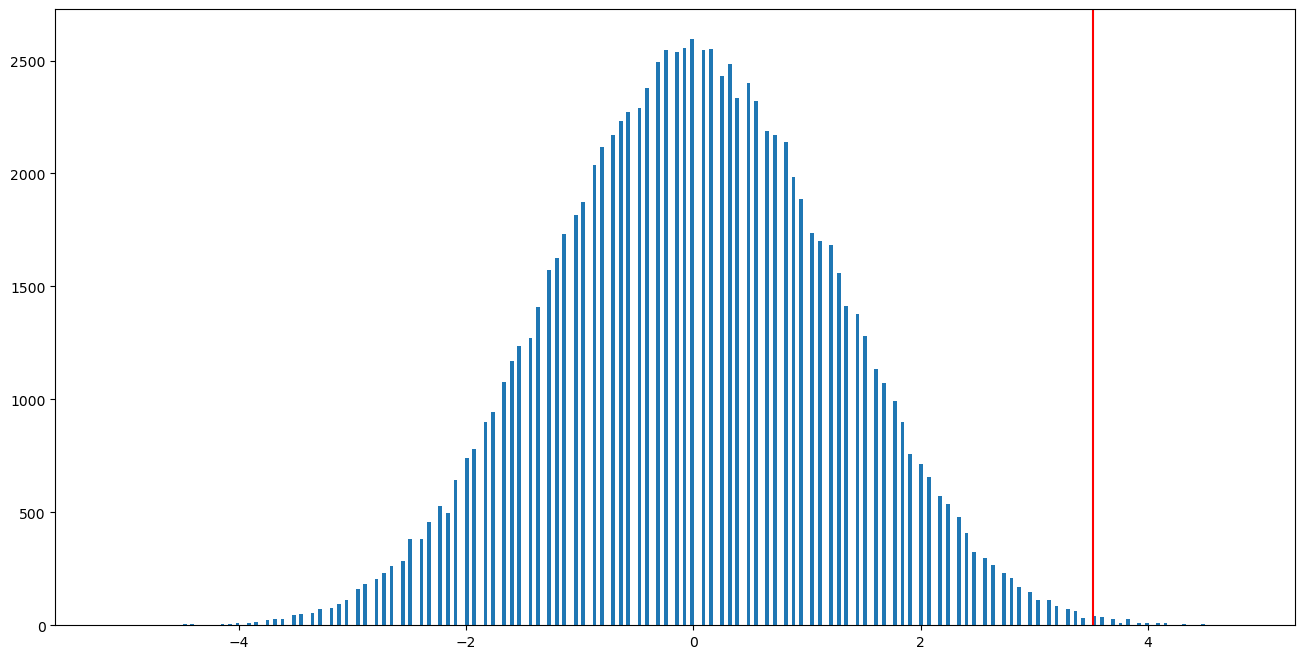

In [58]:
plt.figure(1, figsize=(16, 8))
plt.hist(simulated_means, bins=300)
_ = plt.axvline(x=mean, ymax=1, linewidth=1.5, color="red")
# _ = plt.axvline(x=two_std, ymax=1, linewidth=1.5, color="black")

In [59]:
len(np.where(simulated_means >= mean)[0])

202

In [60]:
obs = len(np.where(simulated_means >= mean)[0]) / samples
obs

0.00202

We are on solid ground. This approach is not just something I came up with. More generally this is a type of statistics called non-parametric statistics which is characterized by having a minimum of requirements for using it.

In particular the above approach is known as Mann Whitney U-test!


In [61]:
alpha = 0.05
stat, p = mannwhitneyu(perfMeasurement1, perfMeasurement2)
print("Statistics=%.3f, p=%.3f" % (stat, p))

# interpret
if p > alpha:
    print("Same distribution (fail to reject H0)")
else:
    print("Different distribution (reject H0)")

Statistics=441.500, p=0.012
Different distribution (reject H0)
